In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv(r'C:\Users\Elizabeth\Documents\Data Analytics\course\TERM4\EN_APEI-Can-Prov_Terr.csv', encoding = 'latin1')
df.head()

,Index,Region,Source,Sector,Subsector,Is it a total,Year,TPM (t),PM10 (t),PM25 (t),...,Pb (kg),Cd (kg),Hg (kg),D/F (gTEQ),B(a)p,B(b)f,B(k)f,"I(1,2,3-cd)p",PAH (kg),HCB (g)
0,1.0,AB,Ore and Mineral Industries,NaN,NaN,y,1990.0,27838.262007,8171.573406,2874.894219,...,416.163534,5.772593,92.824010,0.002173,0.407351,1.425729,0.505794,0.407351,2.746226,NaN
1,1.0,BC,Ore and Mineral Industries,NaN,NaN,y,1990.0,24263.863642,11296.732082,6158.367847,...,57.772251,1.846344,3084.899405,0.000143,9.164659,12.693411,12.110903,5.062677,39.031650,NaN
2,1.0,Unspecified,Ore and Mineral Industries,NaN,NaN,y,1990.0,NaN,NaN,NaN,...,942553.747399,78483.801189,NaN,42.093600,26870.500000,25789.000000,16893.400000,10092.900000,79645.800000,5466.35
3,1.0,MB,Ore and Mineral Industries,NaN,NaN,y,1990.0,10781.344640,6530.918616,3287.360693,...,28.563421,0.525974,19959.679177,0.000143,0.037110,0.129885,0.046078,0.037110,0.250183,NaN
4,1.0,NB,Ore and Mineral Industries,NaN,NaN,y,1990.0,4856.683941,1529.098805,651.456258,...,18.294893,0.949639,121.556350,0.000066,0.099055,0.346693,0.122993,0.099055,0.667797,NaN


In [13]:
colnames = df.columns
colnames

Index(['Index', 'Region', 'Source', 'Sector', 'Subsector', 'Is it a total',
       'Year', 'TPM (t)', 'PM10 (t)', 'PM25 (t)', 'SOX (t)', 'NOX (t)',
       'VOC (t)', 'CO (t)', 'NH3 (t)', 'Pb (kg)', 'Cd (kg)', 'Hg (kg)',
       'D/F (gTEQ)', 'B(a)p', 'B(b)f', 'B(k)f', 'I(1,2,3-cd)p', 'PAH (kg)',
       'HCB (g)'],
      dtype='object')

In [14]:
df.rename(columns = {'Is it a total':'total', 'TPM (t)':'TPM', 'PM10 (t)':'PM10', 'PM25 (t)':'PM25', 'SOX (t)':'SOX',
                    'NOX (t)':'NOX', 'VOC (t)':'VOC', 'CO (t)':'CO', 'NH3 (t)':'NH3', 'Pb (kg)':'Pb', 'Cd (kg)':'Cd',
                    'Hg (kg)':'Hg','D/F (gTEQ)':'DF', 'B(a)p':'Bap', 'B(b)f':'Bbf', 'B(k)f':'Bkf', 'I(1,2,3-cd)p':'Ip', 
                     'PAH (kg)':'PAH', 'HCB (g)':'HCB'}, inplace = True)

In [6]:
pip install pandas-profiling[notebook]

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=cdb31f3a46e74404ddc5cf519d9ba32f0d338874a022c3c980af440696012196
  Stored in directory: c:\users\elizabeth\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=3d57e80f96de1d4e7e0428b9372ffb1247fb415a929d05677a46ca83f17f8d30
  Stored in directory: c:\users\elizabeth\appdata\local\pip\cache\wheels\51\f9\a5\740af2fdb0ad1edf79aabdc41531be0b6f0b2e2be684c388cf
Successfully built htmlmin imagehash
Note: you may need to restart the kernel to use updated packages.


In [5]:
from pandas_profiling import ProfileReport

In [6]:
profile = df.profile_report(title="Pandas Profiling Report")
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
df.dtypes

Index        float64
Region        object
Source        object
Sector        object
Subsector     object
total         object
Year         float64
TPM          float64
PM10         float64
PM25         float64
SOX          float64
NOX          float64
VOC          float64
CO           float64
NH3          float64
Pb           float64
Cd           float64
Hg           float64
DF           float64
Bap          float64
Bbf          float64
Bkf          float64
Ip           float64
PAH          float64
HCB          float64
dtype: object

In [6]:
df.shape

(66390, 25)

In [16]:
#change type of Index and Year from float64 and object respectively to int32
df['Index'] = df['Index'].astype('int')
df['Year'] = df['Year'].astype('int')
df.dtypes

Index          int32
Region        object
Source        object
Sector        object
Subsector     object
total         object
Year           int32
TPM          float64
PM10         float64
PM25         float64
SOX          float64
NOX          float64
VOC          float64
CO           float64
NH3          float64
Pb           float64
Cd           float64
Hg           float64
DF           float64
Bap          float64
Bbf          float64
Bkf          float64
Ip           float64
PAH          float64
HCB          float64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66390 entries, 0 to 66389
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      66390 non-null  int32  
 1   Region     66390 non-null  object 
 2   Source     66390 non-null  object 
 3   Sector     61320 non-null  object 
 4   Subsector  54180 non-null  object 
 5   total      12210 non-null  object 
 6   Year       66390 non-null  int32  
 7   TPM        34032 non-null  float64
 8   PM10       33960 non-null  float64
 9   PM25       34002 non-null  float64
 10  SOX        24136 non-null  float64
 11  NOX        25801 non-null  float64
 12  VOC        30948 non-null  float64
 13  CO         25757 non-null  float64
 14  NH3        22634 non-null  float64
 15  Pb         13164 non-null  float64
 16  Cd         11829 non-null  float64
 17  Hg         20301 non-null  float64
 18  DF         14676 non-null  float64
 19  Bap        14065 non-null  float64
 20  Bbf   

In [18]:
#Count of NA's per column
df.isna().sum()

Index            0
Region           0
Source           0
Sector        5070
Subsector    12210
total        54180
Year             0
TPM          32358
PM10         32430
PM25         32388
SOX          42254
NOX          40589
VOC          35442
CO           40633
NH3          43756
Pb           53226
Cd           54561
Hg           46089
DF           51714
Bap          52325
Bbf          52386
Bkf          52787
Ip           52531
PAH          52933
HCB          59060
dtype: int64

<AxesSubplot:>

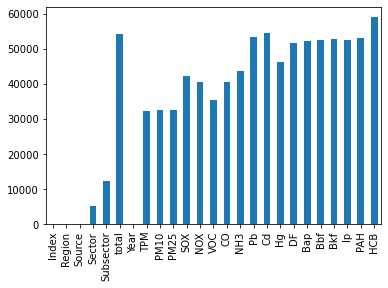

In [19]:
df.isna().sum()[df.isna().sum()>=0].plot(kind='bar')

In [20]:
#total NA's of the dataset
df.isna().sum().sum()

898922

In [21]:
df1 = df.describe()
print(round(df1, 2))

          Index      Year          TPM        PM10        PM25         SOX  \
count  66390.00  66390.00     34032.00    33960.00    34002.00    24136.00   
mean      79.54   2004.50     84379.95    26902.43     5663.52    10932.16   
std       45.63      8.66    833510.51   260958.74    51617.32    82698.84   
min        1.00   1990.00         0.00        0.00        0.00        0.00   
25%       40.00   1997.00        10.40        7.26        4.35        1.48   
50%       80.00   2004.50       149.95      101.47       60.49       45.89   
75%      119.00   2012.00      1606.78      951.23      519.88      811.31   
max      158.00   2019.00  28912967.21  8880675.05  1690838.10  3004321.65   

              NOX         VOC           CO        NH3          Pb        Cd  \
count    25801.00    30948.00     25757.00   22634.00    13164.00  11829.00   
mean     10775.76     9748.23     39647.74    2677.07     4968.40    406.64   
std      85643.38    84028.98    331672.54   20532.46    431

array([[<AxesSubplot:title={'center':'TPM'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'PM25'}>,
        <AxesSubplot:title={'center':'SOX'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'VOC'}>,
        <AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'Pb'}>,
        <AxesSubplot:title={'center':'Cd'}>,
        <AxesSubplot:title={'center':'Hg'}>,
        <AxesSubplot:title={'center':'DF'}>],
       [<AxesSubplot:title={'center':'Bap'}>,
        <AxesSubplot:title={'center':'Bbf'}>,
        <AxesSubplot:title={'center':'Bkf'}>,
        <AxesSubplot:title={'center':'Ip'}>],
       [<AxesSubplot:title={'center':'PAH'}>,
        <AxesSubplot:title={'center':'HCB'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

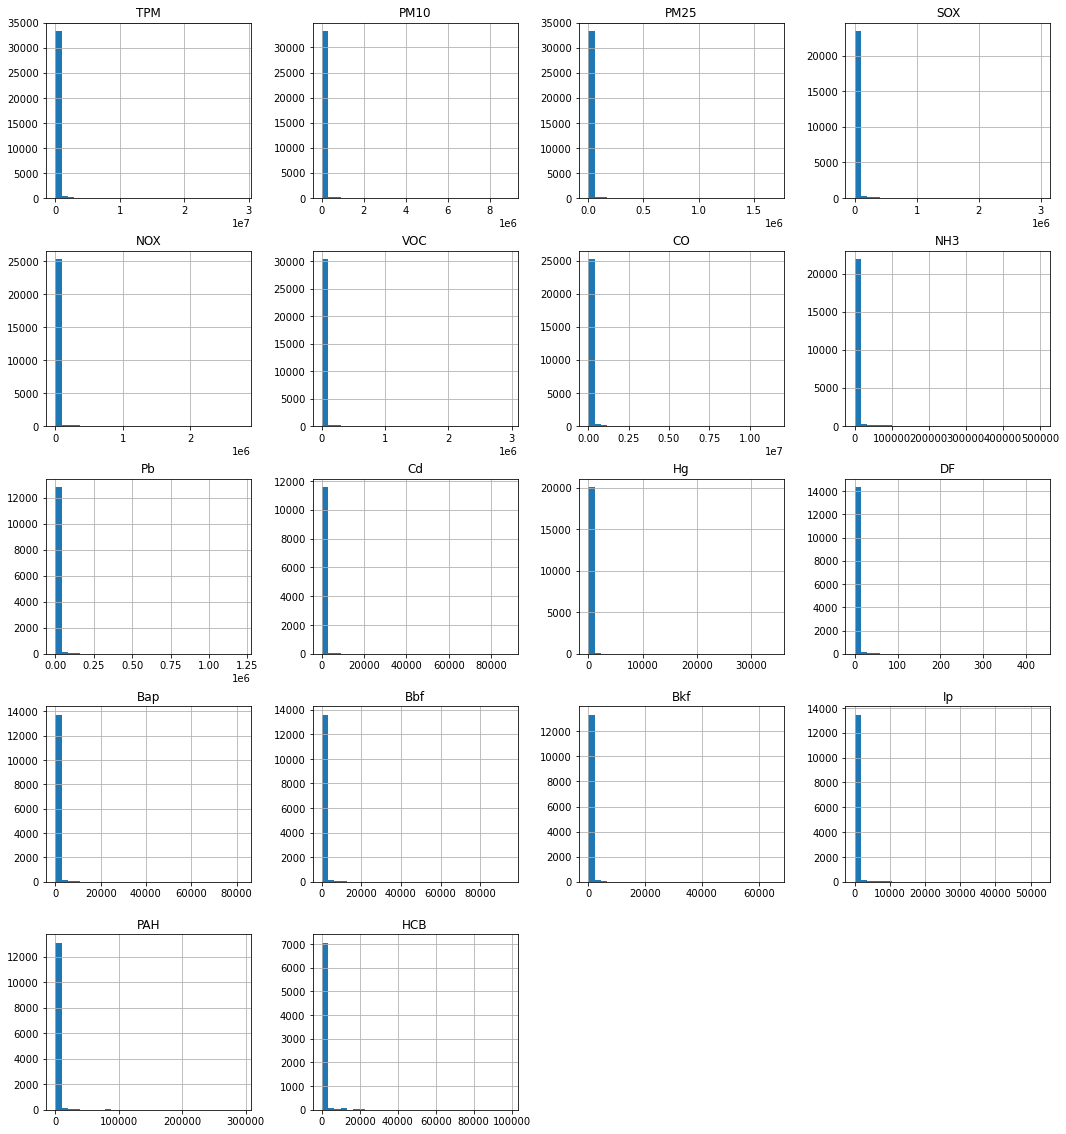

In [22]:
df_test = df.drop(['Index', 'Year'], axis=1)
df_test.hist(bins=30, figsize=(18, 20))

In [23]:
df['Region'].value_counts(dropna=False).sort_index(ascending=True)

AB             4740
BC             4740
CA               30
MB             4740
NB             4740
NL             4740
NS             4740
NT             4740
NU             4740
ON             4740
PE             4740
QC             4740
SK             4740
Unspecified    4740
YT             4740
Name: Region, dtype: int64

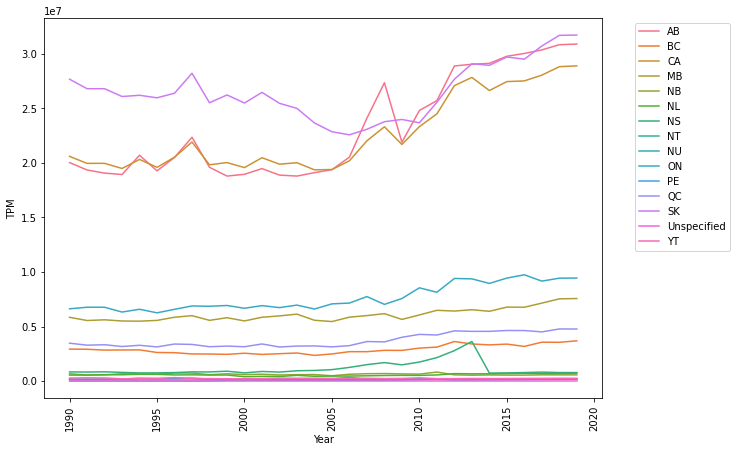

In [24]:
dfg = df.groupby(['Year', 'Region']).agg({'TPM': sum}).reset_index()
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='TPM', data=dfg, hue='Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

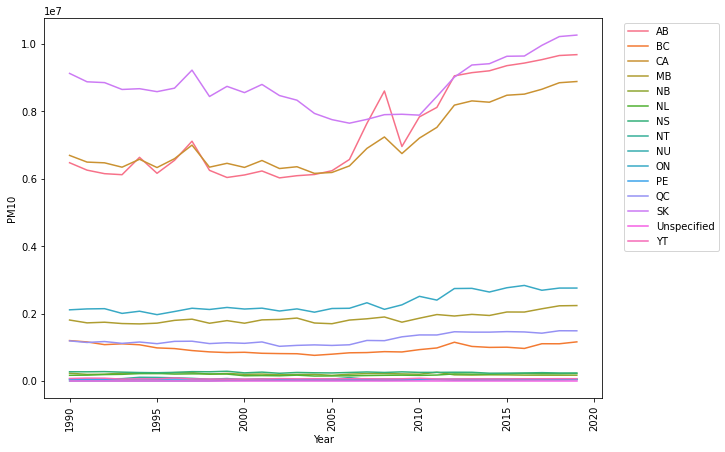

In [25]:
dfg = df.groupby(['Year', 'Region']).agg({'PM10': sum}).reset_index()
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='PM10', data=dfg, hue='Region')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

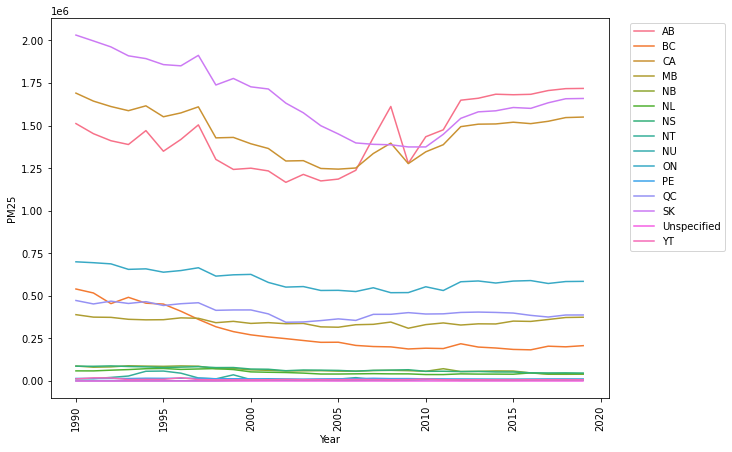

In [26]:
dfg = df.groupby(['Year', 'Region']).agg({'PM25': sum}).reset_index()
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='PM25', data=dfg, hue='Region')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

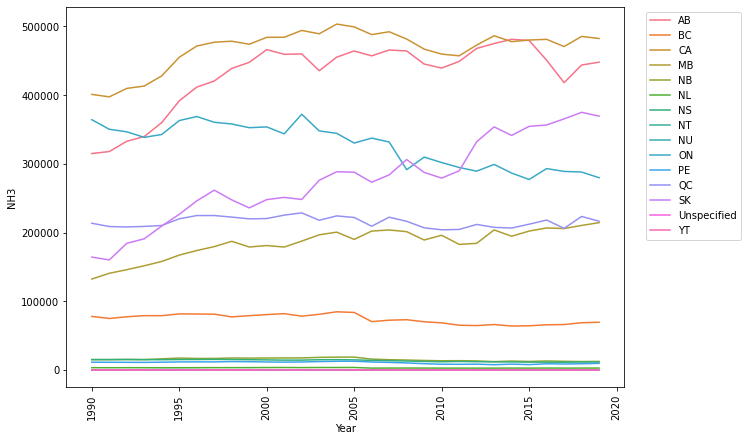

In [27]:
dfg = df.groupby(['Year', 'Region']).agg({'NH3': sum}).reset_index()
plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='NH3', data=dfg, hue='Region')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

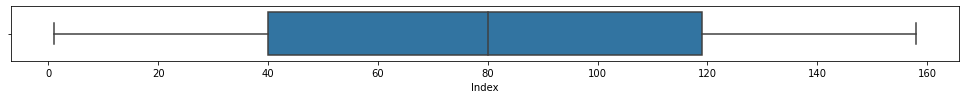

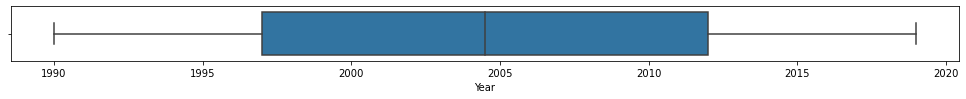

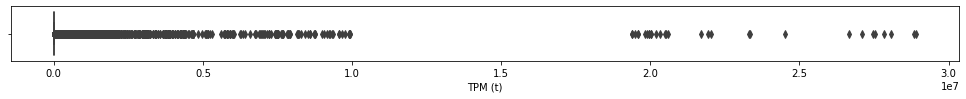

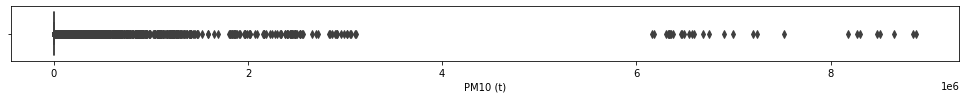

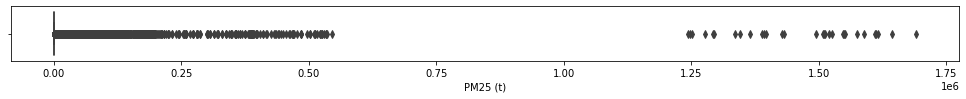

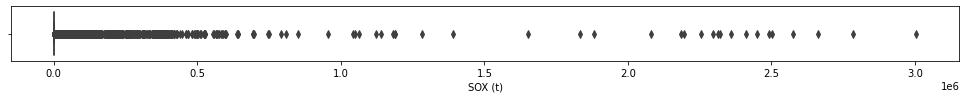

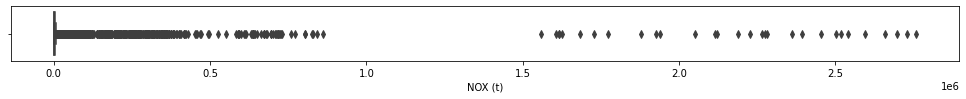

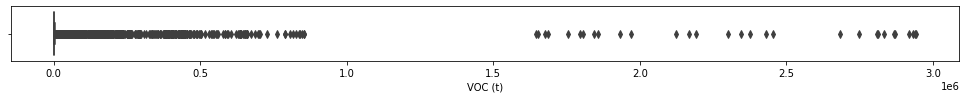

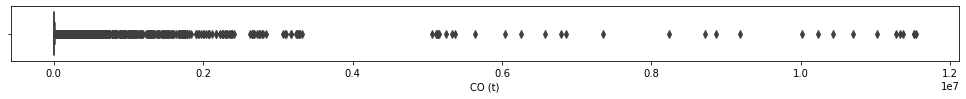

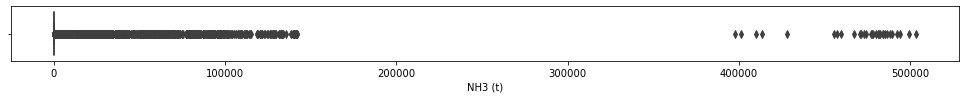

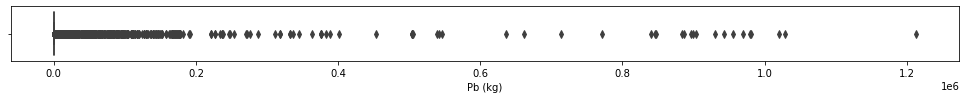

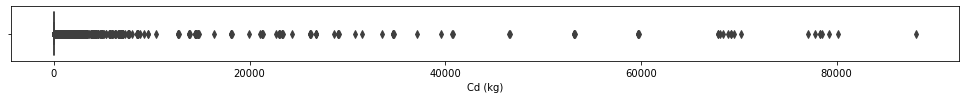

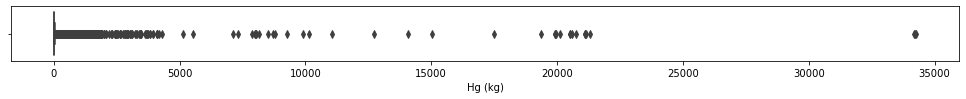

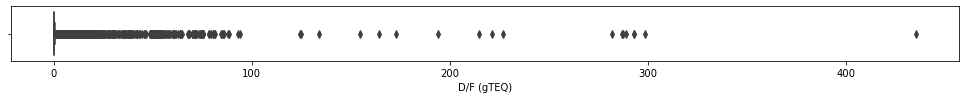

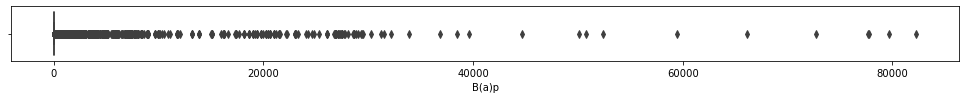

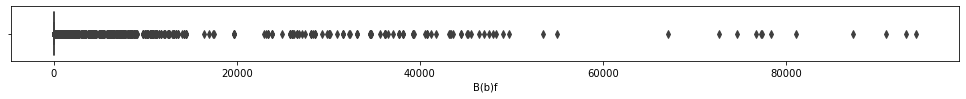

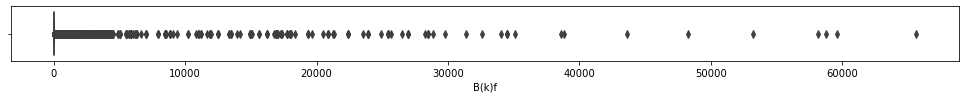

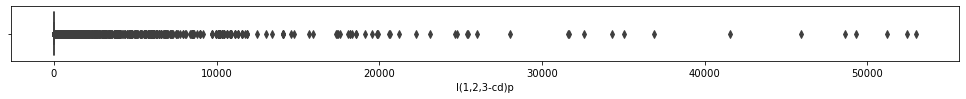

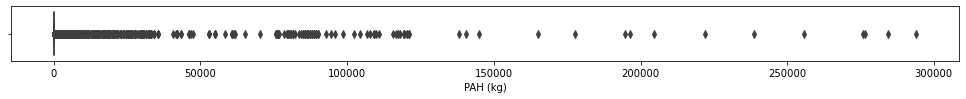

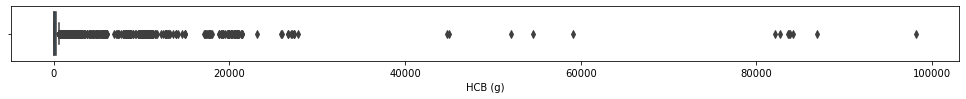

In [10]:
dfb=df.select_dtypes(exclude=['object', 'int32'])
for att in dfb:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=dfb, x=att)

In [11]:
cors = df.corr(method="pearson")
cors

,Index,Year,TPM (t),PM10 (t),PM25 (t),SOX (t),NOX (t),VOC (t),CO (t),NH3 (t),Pb (kg),Cd (kg),Hg (kg),D/F (gTEQ),B(a)p,B(b)f,B(k)f,"I(1,2,3-cd)p",PAH (kg),HCB (g)
Index,1.000000e+00,7.111962e-13,0.133616,0.131207,0.123021,0.026094,0.090393,0.081061,0.105210,0.127754,-0.006785,-0.004056,0.021270,0.116571,0.007203,-0.001279,-0.026327,0.061108,0.003771,0.106703
Year,7.111962e-13,1.000000e+00,0.011542,0.009447,-0.004473,-0.037211,-0.011896,-0.017851,-0.030734,0.018440,-0.090834,-0.079192,-0.068263,-0.105878,-0.072216,-0.057406,-0.080623,-0.057808,-0.068392,-0.173612
TPM (t),1.336159e-01,1.154229e-02,1.000000,0.997332,0.969401,0.758026,0.857297,0.851930,0.787096,0.894406,0.541261,0.468464,0.478484,0.573973,0.640577,0.597416,0.520852,0.692173,0.618009,0.514984
PM10 (t),1.312075e-01,9.446717e-03,0.997332,1.000000,0.980001,0.761782,0.858327,0.854270,0.791654,0.896631,0.548465,0.473535,0.484610,0.581724,0.647150,0.602842,0.527845,0.698008,0.624195,0.523515
PM25 (t),1.230212e-01,-4.472791e-03,0.969401,0.980001,1.000000,0.806253,0.885176,0.890483,0.845793,0.901716,0.615468,0.518946,0.540688,0.650651,0.715217,0.661624,0.594902,0.762084,0.688825,0.597532
SOX (t),2.609409e-02,-3.721074e-02,0.758026,0.761782,0.806253,1.000000,0.882953,0.887712,0.854938,0.803862,0.792275,0.728563,0.696132,0.745009,0.777034,0.720254,0.673567,0.801619,0.750521,0.712653
NOX (t),9.039267e-02,-1.189551e-02,0.857297,0.858327,0.885176,0.882953,1.000000,0.969348,0.938590,0.866179,0.648538,0.551042,0.546374,0.701658,0.735722,0.684748,0.615146,0.781243,0.710340,0.661435
VOC (t),8.106054e-02,-1.785102e-02,0.851930,0.854270,0.890483,0.887712,0.969348,1.000000,0.949922,0.845196,0.685246,0.571313,0.582689,0.745623,0.779416,0.720461,0.659847,0.821900,0.751293,0.698665
CO (t),1.052099e-01,-3.073374e-02,0.787096,0.791654,0.845793,0.854938,0.938590,0.949922,1.000000,0.819628,0.725230,0.590842,0.603928,0.761435,0.826691,0.763457,0.714512,0.863868,0.798185,0.751465
NH3 (t),1.277544e-01,1.843999e-02,0.894406,0.896631,0.901716,0.803862,0.866179,0.845196,0.819628,1.000000,0.602538,0.582318,0.563912,0.609910,0.675615,0.638951,0.555073,0.725111,0.655360,0.550261


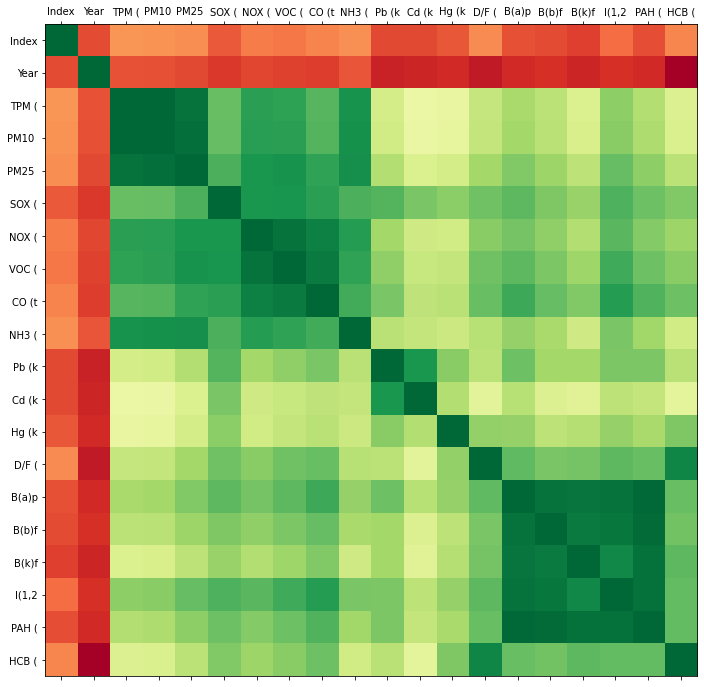

In [28]:
labels = [c[:5] for c in cors.columns]
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.matshow(cors, cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

In [29]:
Region_count = sum(df['Region'].value_counts(dropna=False))
Region_count

66390

In [30]:
df['Source'].value_counts(dropna=False).sort_index(ascending=False)

Transportation and Mobile Equipment          7140
Paints and Solvents                          2100
Ore and Mineral Industries                  16380
Oil and Gas Industry                         7980
Manufacturing                               12600
Incineration and Waste                       5460
GRAND TOTAL                                   450
Fires                                        1260
Electric Power Generation (Utilities)        2520
Dust                                         2520
Commercial/Residential/Institutional          420
Commercial / Residential / Institutional     3780
Agriculture                                  3780
Name: Source, dtype: int64

In [31]:
df['Source'].isna().sum()

0

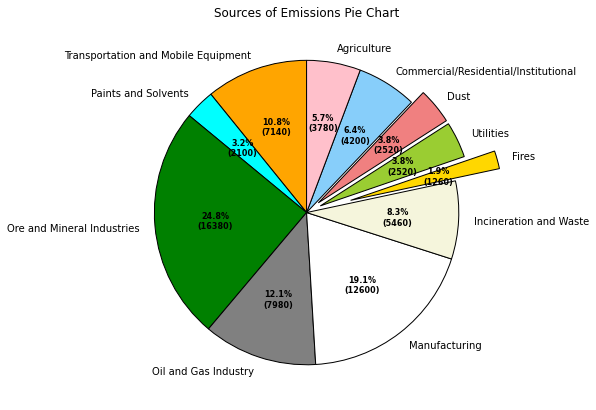

In [32]:
df['Source'].value_counts (dropna=False)

Source = ['Transportation and Mobile Equipment', 'Paints and Solvents', 'Ore and Mineral Industries', 'Oil and Gas Industry',
        'Manufacturing', 'Incineration and Waste', 'Fires', 'Utilities', 'Dust', 'Commercial/Residential/Institutional',
        'Agriculture'] 
data = [7140, 2100, 16380, 7980, 12600, 5460, 1260, 2520, 2520, 4200, 3780]
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.1, 0.1, 0.0, 0.0)
colors = ( 'orange', 'cyan', 'green', 'grey', 'white', 'beige',
          'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink')  
wp = { 'linewidth' : 1, 'edgecolor' : 'black' } 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return '{:.1f}%\n({:d})'.format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
    autopct = lambda pct: func(pct, data), 
    explode = explode,
    labels = Source,  
    colors = colors, 
    startangle = 90, 
    wedgeprops = wp, 
    textprops = dict(color ='black')) 

plt.setp(autotexts, size=8, weight='bold')

ax.set_title('Sources of Emissions Pie Chart')

plt.show() 

In [33]:
df['Sector'].value_counts(dropna=False).sort_index(ascending=True)

Abrasives Manufacturing          420
Air Transportation (LTO)         420
Aluminium Industry              1680
Animal Production                420
Asphalt Paving Industry          420
                                ... 
Waste Incineration              2100
Waste Materials                  420
Waste Treatment and Disposal    2520
Wood Products                   1680
NaN                             5070
Name: Sector, Length: 74, dtype: int64

In [34]:
df['Sector'] = df['Sector'].fillna('Unspecified')
df['Sector'].value_counts(dropna=False).sort_index(ascending=True)

Abrasives Manufacturing                                        420
Air Transportation (LTO)                                       420
Aluminium Industry                                            1680
Animal Production                                              420
Asphalt Paving Industry                                        420
                                                              ... 
Vehicle Manufacturing (Engines, Parts, Assembly, Painting)     420
Waste Incineration                                            2100
Waste Materials                                                420
Waste Treatment and Disposal                                  2520
Wood Products                                                 1680
Name: Sector, Length: 74, dtype: int64

In [35]:
df['Sector'].isna().sum()

0

In [36]:
df['Subsector'].value_counts(dropna=False).sort_index(ascending=True)

Abrasives Manufacturing               420
Accidents and Equipment Failures      420
Air Transportation (LTO)              420
Alumina (Bauxite Refining)            420
Animal Production                     420
                                    ...  
Waste Materials                       420
Waste Sorting and Transfer            420
Well Drilling/Servicing/Testing       420
Wind Erosion                          420
NaN                                 12210
Name: Subsector, Length: 130, dtype: int64

In [37]:
df['Subsector'] = df['Subsector'].fillna('No_subsector')
df['Subsector'].value_counts(dropna=False).sort_index(ascending=True)

Abrasives Manufacturing             420
Accidents and Equipment Failures    420
Air Transportation (LTO)            420
Alumina (Bauxite Refining)          420
Animal Production                   420
                                   ... 
Warehousing and Storage             420
Waste Materials                     420
Waste Sorting and Transfer          420
Well Drilling/Servicing/Testing     420
Wind Erosion                        420
Name: Subsector, Length: 130, dtype: int64

In [38]:
df['Subsector'].isna().sum()

0

In [39]:
df['total'].value_counts(dropna=False)

NaN    54180
y      12210
Name: total, dtype: int64

In [40]:
df['total'] = df['total'].fillna('n')
df['total'].value_counts(dropna=False)

n    54180
y    12210
Name: total, dtype: int64

In [41]:
df['total'].isna().sum()

0

In [42]:
df2 = df[df.Region != 'Unspecified']
df2.head()

,Index,Region,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,AB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,27838.262007,8171.573406,2874.894219,...,416.163534,5.772593,92.824010,0.002173,0.407351,1.425729,0.505794,0.407351,2.746226,NaN
1,1,BC,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,24263.863642,11296.732082,6158.367847,...,57.772251,1.846344,3084.899405,0.000143,9.164659,12.693411,12.110903,5.062677,39.031650,NaN
3,1,MB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,10781.344640,6530.918616,3287.360693,...,28.563421,0.525974,19959.679177,0.000143,0.037110,0.129885,0.046078,0.037110,0.250183,NaN
4,1,NB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,4856.683941,1529.098805,651.456258,...,18.294893,0.949639,121.556350,0.000066,0.099055,0.346693,0.122993,0.099055,0.667797,NaN
5,1,NL,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,26990.264763,3670.509960,1494.637876,...,46.037566,0.383072,62.834248,0.000244,0.012756,0.044645,0.015838,0.012756,0.085994,NaN


In [43]:
df3 = df2[df2.Region != 'CA']
df3.head()

,Index,Region,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,AB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,27838.262007,8171.573406,2874.894219,...,416.163534,5.772593,92.824010,0.002173,0.407351,1.425729,0.505794,0.407351,2.746226,NaN
1,1,BC,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,24263.863642,11296.732082,6158.367847,...,57.772251,1.846344,3084.899405,0.000143,9.164659,12.693411,12.110903,5.062677,39.031650,NaN
3,1,MB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,10781.344640,6530.918616,3287.360693,...,28.563421,0.525974,19959.679177,0.000143,0.037110,0.129885,0.046078,0.037110,0.250183,NaN
4,1,NB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,4856.683941,1529.098805,651.456258,...,18.294893,0.949639,121.556350,0.000066,0.099055,0.346693,0.122993,0.099055,0.667797,NaN
5,1,NL,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,26990.264763,3670.509960,1494.637876,...,46.037566,0.383072,62.834248,0.000244,0.012756,0.044645,0.015838,0.012756,0.085994,NaN


In [44]:
df3.fillna(0, inplace=True)
df3.head()

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Index,Region,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,AB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,27838.262007,8171.573406,2874.894219,...,416.163534,5.772593,92.824010,0.002173,0.407351,1.425729,0.505794,0.407351,2.746226,0.0
1,1,BC,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,24263.863642,11296.732082,6158.367847,...,57.772251,1.846344,3084.899405,0.000143,9.164659,12.693411,12.110903,5.062677,39.031650,0.0
3,1,MB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,10781.344640,6530.918616,3287.360693,...,28.563421,0.525974,19959.679177,0.000143,0.037110,0.129885,0.046078,0.037110,0.250183,0.0
4,1,NB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,4856.683941,1529.098805,651.456258,...,18.294893,0.949639,121.556350,0.000066,0.099055,0.346693,0.122993,0.099055,0.667797,0.0
5,1,NL,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,26990.264763,3670.509960,1494.637876,...,46.037566,0.383072,62.834248,0.000244,0.012756,0.044645,0.015838,0.012756,0.085994,0.0


In [45]:
df3.isna().sum()

Index        0
Region       0
Source       0
Sector       0
Subsector    0
total        0
Year         0
TPM          0
PM10         0
PM25         0
SOX          0
NOX          0
VOC          0
CO           0
NH3          0
Pb           0
Cd           0
Hg           0
DF           0
Bap          0
Bbf          0
Bkf          0
Ip           0
PAH          0
HCB          0
dtype: int64

In [46]:
#round to two decimal places
df3 = df3.round(decimals = 2)
df3.head()

,Index,Region,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,AB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,27838.26,8171.57,2874.89,...,416.16,5.77,92.82,0.0,0.41,1.43,0.51,0.41,2.75,0.0
1,1,BC,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,24263.86,11296.73,6158.37,...,57.77,1.85,3084.90,0.0,9.16,12.69,12.11,5.06,39.03,0.0
3,1,MB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,10781.34,6530.92,3287.36,...,28.56,0.53,19959.68,0.0,0.04,0.13,0.05,0.04,0.25,0.0
4,1,NB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,4856.68,1529.10,651.46,...,18.29,0.95,121.56,0.0,0.10,0.35,0.12,0.10,0.67,0.0
5,1,NL,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,26990.26,3670.51,1494.64,...,46.04,0.38,62.83,0.0,0.01,0.04,0.02,0.01,0.09,0.0


In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61620 entries, 0 to 66389
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      61620 non-null  int32  
 1   Region     61620 non-null  object 
 2   Source     61620 non-null  object 
 3   Sector     61620 non-null  object 
 4   Subsector  61620 non-null  object 
 5   total      61620 non-null  object 
 6   Year       61620 non-null  int32  
 7   TPM        61620 non-null  float64
 8   PM10       61620 non-null  float64
 9   PM25       61620 non-null  float64
 10  SOX        61620 non-null  float64
 11  NOX        61620 non-null  float64
 12  VOC        61620 non-null  float64
 13  CO         61620 non-null  float64
 14  NH3        61620 non-null  float64
 15  Pb         61620 non-null  float64
 16  Cd         61620 non-null  float64
 17  Hg         61620 non-null  float64
 18  DF         61620 non-null  float64
 19  Bap        61620 non-null  float64
 20  Bbf   

In [48]:
df3.describe()

,Index,Year,TPM,PM10,PM25,SOX,NOX,VOC,CO,NH3,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
count,61620.000000,61620.000000,6.162000e+04,6.162000e+04,61620.000000,6.162000e+04,61620.000000,61620.000000,6.162000e+04,61620.000000,61620.000000,61620.000000,61620.000000,61620.000000,61620.000000,61620.000000,61620.000000,61620.000000,61620.000000,61620.000000
mean,79.500000,2004.500000,3.558999e+04,1.136599e+04,2415.199495,3.369855e+03,3462.031862,3770.205488,1.262756e+04,755.384690,624.367813,47.383867,19.235482,0.254201,57.557259,85.072903,39.653152,44.944500,227.094258,59.659968
std,45.610128,8.655512,3.629581e+05,1.131387e+05,20942.882884,2.815050e+04,27806.965521,29496.663013,1.072802e+05,7056.056781,9568.370403,948.571752,318.739068,2.980174,756.770798,1266.847183,705.930875,511.848273,3176.551703,821.888752
min,1.000000,1990.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1997.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79.500000,2004.500000,4.900000e-01,4.000000e-01,0.300000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,119.000000,2012.000000,2.226750e+02,1.556200e+02,97.310000,8.830000e+00,107.325000,193.780000,1.790200e+02,1.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,158.000000,2019.000000,9.930312e+06,3.108116e+06,545334.340000,1.123190e+06,860792.630000,854321.660000,3.326566e+06,141887.550000,504786.170000,59774.530000,21310.710000,133.750000,33922.150000,49765.450000,38591.080000,20630.540000,138287.270000,27337.940000


array([[<AxesSubplot:title={'center':'TPM'}>,
        <AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'PM25'}>,
        <AxesSubplot:title={'center':'SOX'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'VOC'}>,
        <AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'NH3'}>],
       [<AxesSubplot:title={'center':'Pb'}>,
        <AxesSubplot:title={'center':'Cd'}>,
        <AxesSubplot:title={'center':'Hg'}>,
        <AxesSubplot:title={'center':'DF'}>],
       [<AxesSubplot:title={'center':'Bap'}>,
        <AxesSubplot:title={'center':'Bbf'}>,
        <AxesSubplot:title={'center':'Bkf'}>,
        <AxesSubplot:title={'center':'Ip'}>],
       [<AxesSubplot:title={'center':'PAH'}>,
        <AxesSubplot:title={'center':'HCB'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

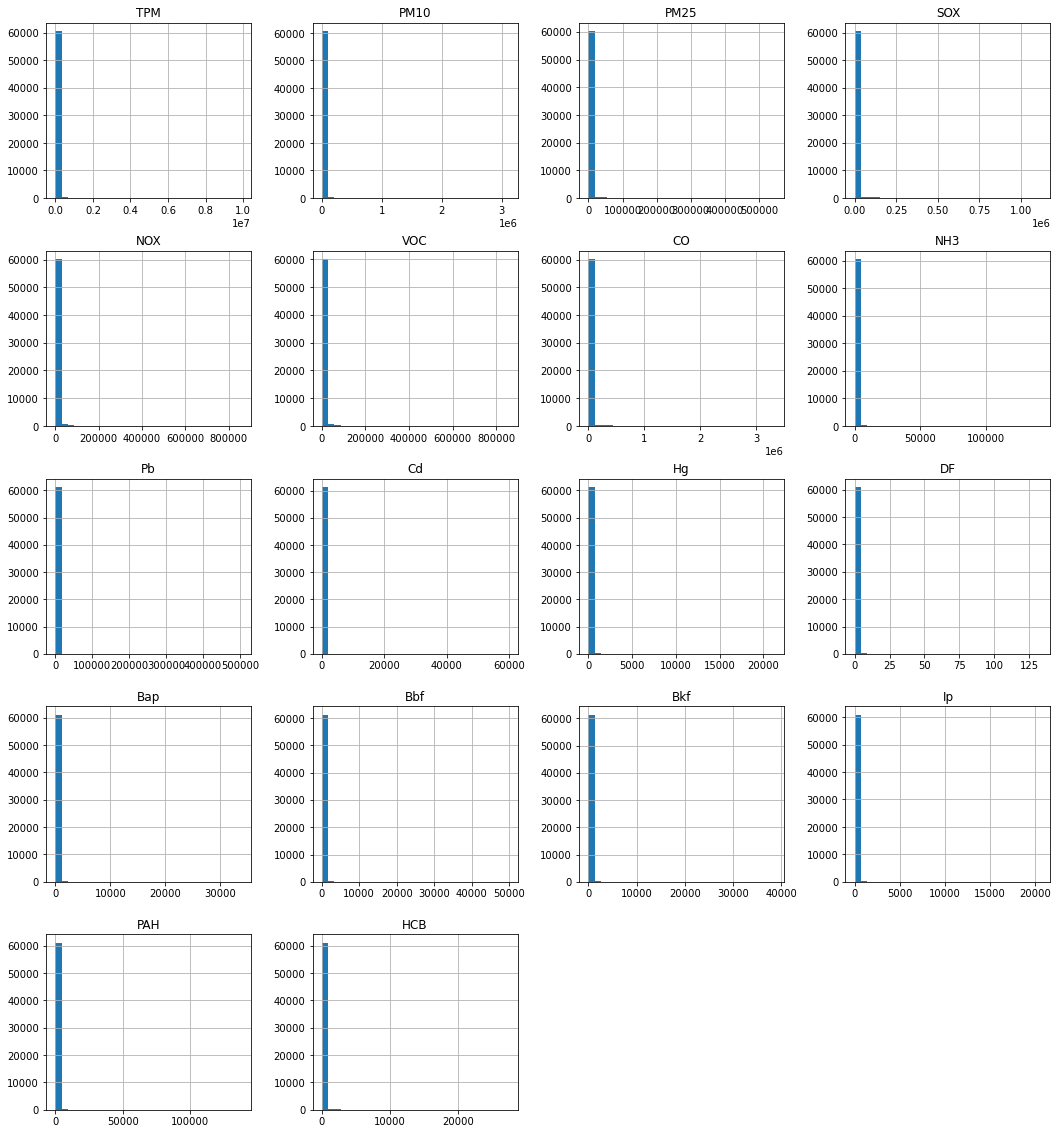

In [49]:
df3_test = df3.drop(['Index', 'Year'], axis=1)
df3_test.hist(bins=30, figsize=(18, 20))

In [50]:
cors1 = df3.corr(method="pearson")
cors1

,Index,Year,TPM,PM10,PM25,SOX,NOX,VOC,CO,NH3,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
Index,1.000000e+00,-6.751997e-13,0.138135,0.135741,0.134219,-0.017992,0.057193,0.079706,0.078849,0.106283,-0.025650,-0.014034,0.004529,0.094254,0.024286,0.008942,-0.000704,0.050256,0.017289,0.067626
Year,-6.751997e-13,1.000000e+00,0.010102,0.008251,-0.005800,-0.041359,-0.016134,-0.023292,-0.034599,0.005032,-0.026292,-0.017131,-0.044787,-0.051189,-0.025381,-0.020484,-0.028772,-0.025867,-0.024779,-0.051976
TPM,1.381353e-01,1.010230e-02,1.000000,0.992782,0.932938,0.270318,0.387361,0.379468,0.267592,0.483162,0.071642,0.059331,0.104206,0.077811,0.100336,0.074325,0.064392,0.127529,0.088408,0.074072
PM10,1.357406e-01,8.251354e-03,0.992782,1.000000,0.958971,0.274266,0.393799,0.387493,0.276055,0.512008,0.073983,0.059506,0.106611,0.081474,0.107801,0.080811,0.069714,0.136600,0.095417,0.077085
PM25,1.342194e-01,-5.800238e-03,0.932938,0.958971,1.000000,0.325923,0.457789,0.460919,0.368715,0.589370,0.112494,0.073576,0.134974,0.126567,0.185733,0.148938,0.125578,0.228164,0.168320,0.116504
SOX,-1.799165e-02,-4.135889e-02,0.270318,0.274266,0.325923,1.000000,0.621143,0.599260,0.472747,0.352453,0.497280,0.471279,0.455762,0.197822,0.274386,0.242676,0.216330,0.296215,0.257937,0.211175
NOX,5.719334e-02,-1.613411e-02,0.387361,0.393799,0.457789,0.621143,1.000000,0.884397,0.804338,0.456458,0.197009,0.097138,0.184677,0.228184,0.291339,0.229005,0.203939,0.346320,0.261860,0.216000
VOC,7.970563e-02,-2.329236e-02,0.379468,0.387493,0.460919,0.599260,0.884397,1.000000,0.805707,0.493392,0.217904,0.106476,0.192357,0.261143,0.346833,0.283102,0.247242,0.410316,0.316597,0.245979
CO,7.884883e-02,-3.459870e-02,0.267592,0.276055,0.368715,0.472747,0.804338,0.805707,1.000000,0.393962,0.275783,0.121027,0.207560,0.311899,0.484655,0.406468,0.367547,0.556746,0.448962,0.275238
NH3,1.062830e-01,5.032138e-03,0.483162,0.512008,0.589370,0.352453,0.456458,0.493392,0.393962,1.000000,0.159660,0.109624,0.146747,0.154600,0.205242,0.170255,0.145630,0.239887,0.187817,0.149176


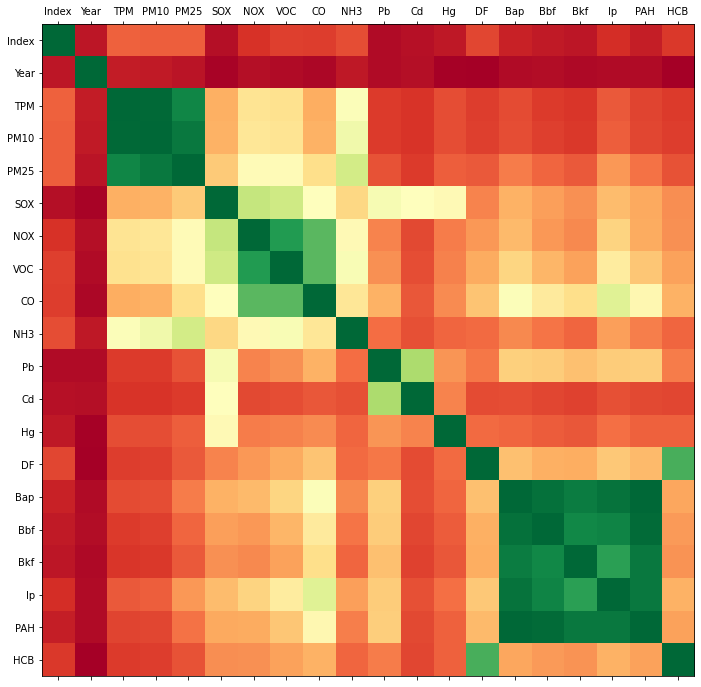

In [51]:
labels = [c[:5] for c in cors1.columns]
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.matshow(cors1, cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

In [52]:
df3.head()

,Index,Region,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,AB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,27838.26,8171.57,2874.89,...,416.16,5.77,92.82,0.0,0.41,1.43,0.51,0.41,2.75,0.0
1,1,BC,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,24263.86,11296.73,6158.37,...,57.77,1.85,3084.90,0.0,9.16,12.69,12.11,5.06,39.03,0.0
3,1,MB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,10781.34,6530.92,3287.36,...,28.56,0.53,19959.68,0.0,0.04,0.13,0.05,0.04,0.25,0.0
4,1,NB,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,4856.68,1529.10,651.46,...,18.29,0.95,121.56,0.0,0.10,0.35,0.12,0.10,0.67,0.0
5,1,NL,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,26990.26,3670.51,1494.64,...,46.04,0.38,62.83,0.0,0.01,0.04,0.02,0.01,0.09,0.0


In [53]:
a = sum(df3.Year == 2019)
a

2054

In [54]:
b = sum(df3.Year != 2019)
b

59566

In [55]:
t = 61620
yrcount = t - a - b
yrcount

0

In [56]:
test_index = (a / t)
test_index

0.03333333333333333

In [57]:
train_index = (b / t)
train_index

0.9666666666666667

In [58]:
#Decision Tree Model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [59]:
#Decision Tree Classifier
Xd = df3.values[ : , 0:1 & 3:]
Yd = df3.values[ : , 2] #according to Source

In [60]:
X_train, X_test, y_train, y_test = train_test_split(Xd, Yd, test_size = 0.03333, random_state = 1)

In [61]:
tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 10,
                                     min_samples_leaf = 3)
tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       random_state=1)

In [62]:
y_pred_en = tree_entropy.predict(X_test)
y_pred_en

array(['Ore and Mineral Industries', 'Manufacturing',
       'Paints and Solvents', ..., 'Ore and Mineral Industries',
       'Ore and Mineral Industries',
       'Commercial / Residential / Institutional'], dtype=object)

In [63]:
print(("The Accuracy is"), accuracy_score(y_test, y_pred_en)*100)

The Accuracy is 100.0


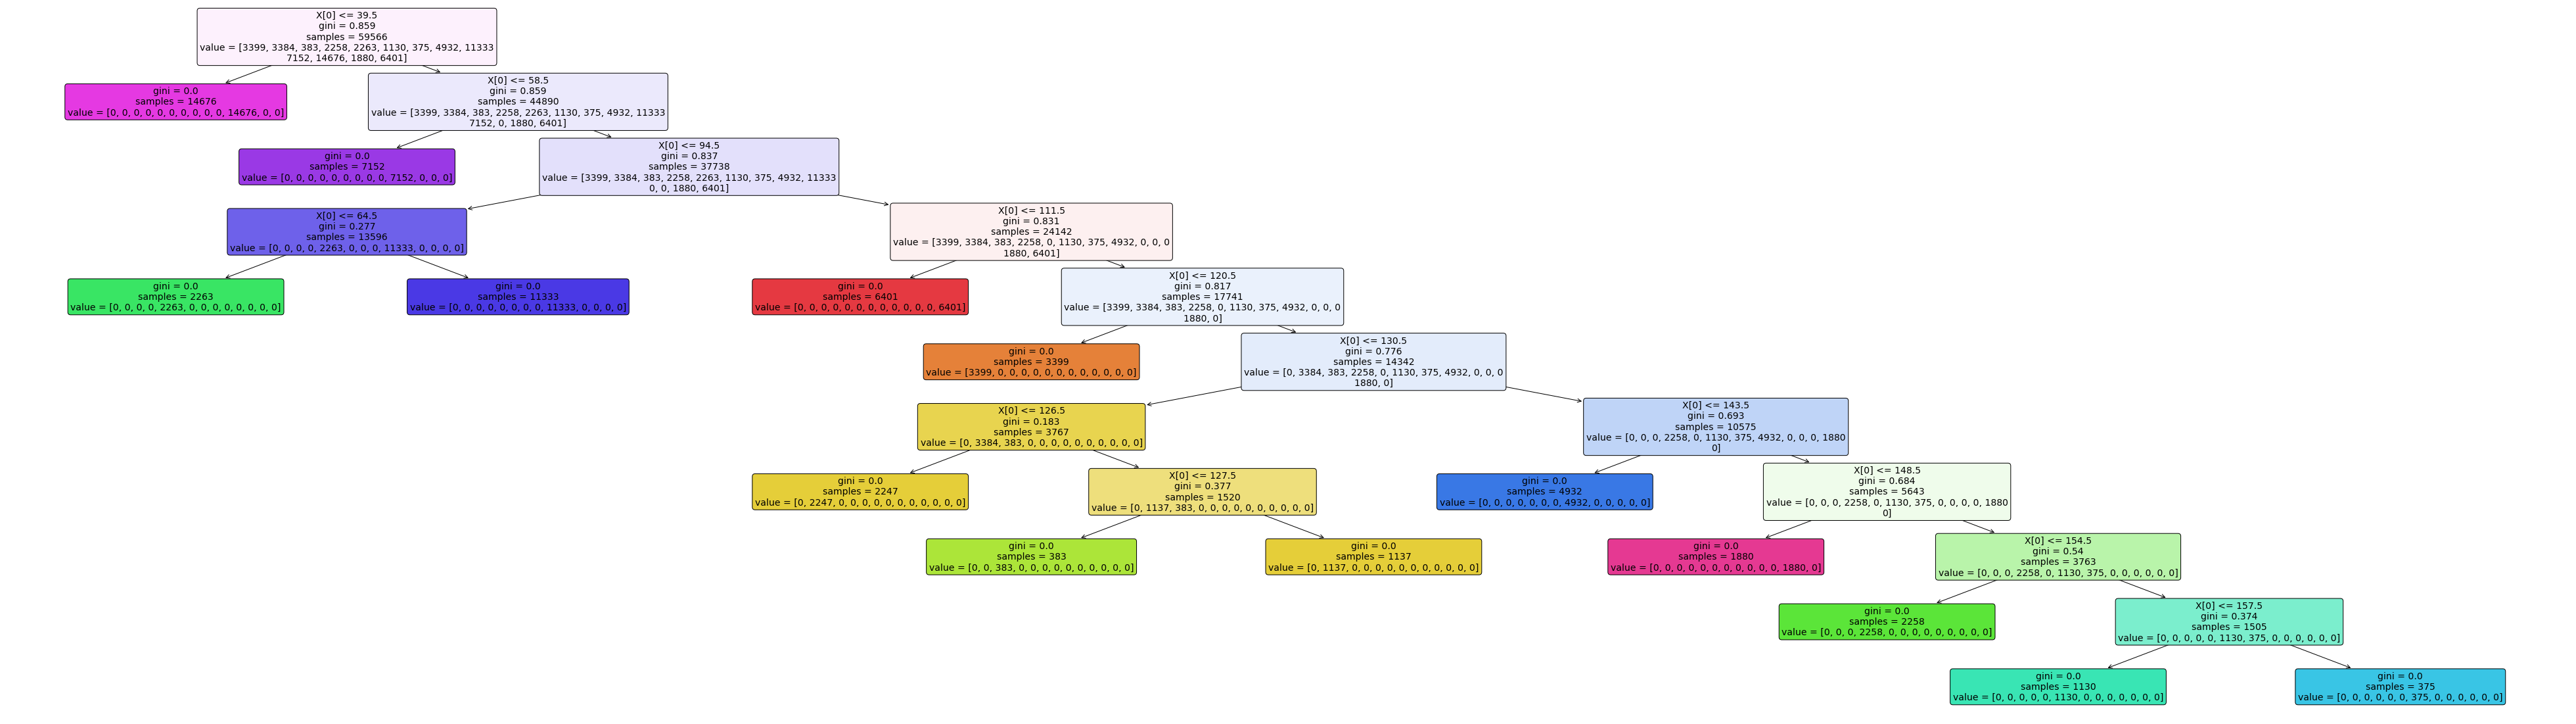

In [64]:
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(max_depth=10, random_state = 1) #max_depth is maximum number of levels in the tree
clf.fit(X_train, y_train)

plt.figure(figsize=(70,20))
a = plot_tree(clf, 
              filled=True, 
              rounded=True, 
              fontsize=14)

#0 denotes that all elements belong to a certain class or if there exists only one class, and
#1 denotes that the elements are randomly distributed across various classes.
#0.5 denotes equally distributed elements into some classes.


In [65]:
X = df3[['Year', 'TPM', 'PM10', 'PM25', 'SOX', 'NOX', 'VOC', 'CO', 'NH3', 'Pb', 'Cd',
                    'Hg','DF', 'Bap', 'Bbf', 'Bkf', 'Ip', 'PAH', 'HCB']] 
y = df3['Source']

model = clf.fit(X, y)

<AxesSubplot:>

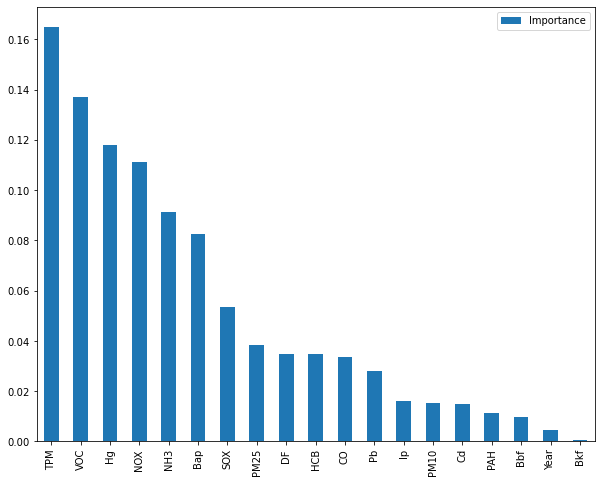

In [66]:
feat_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns = ["Importance"])
feat_importances.sort_values(by = 'Importance', ascending = False, inplace = True)
feat_importances.plot(kind = 'bar', figsize = (10, 8))

<AxesSubplot:>

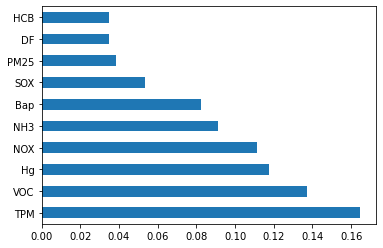

In [67]:
feat_importances1 = pd.Series(model.feature_importances_, index=X.columns)
feat_importances1.nlargest(10).plot(kind='barh')

In [68]:
#Random Forest Classifier

from sklearn.model_selection import train_test_split

X2 = df3[['Year', 'TPM', 'PM10', 'PM25', 'SOX', 'NOX', 'VOC', 'CO', 'NH3', 'Pb', 'Cd',
                    'Hg','DF', 'Bap', 'Bbf', 'Bkf', 'Ip', 'PAH', 'HCB']] 
y2 = df3['Source']

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.03333)

In [69]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [70]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 72.83349561830575


In [71]:
clf.predict([[1997, 452, 662, 2000, 10, 11, 12, 13, 1224, 107, 182, 1999, 20, 4, 809, 2091, 271, 40, 1872]])

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Incineration and Waste'], dtype=object)

In [72]:
clf = RandomForestClassifier(n_estimators = 100)

model = clf.fit(X2, y2)

<AxesSubplot:>

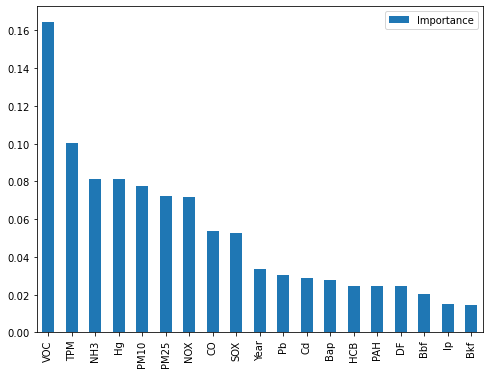

In [73]:
feat_importances = pd.DataFrame(model.feature_importances_, index = X2.columns, columns = ["Importance"])
feat_importances.sort_values(by = 'Importance', ascending = False, inplace = True)
feat_importances.plot(kind = 'bar', figsize = (8,6))

<AxesSubplot:>

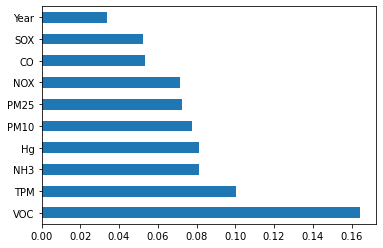

In [74]:
feat_importances2 = pd.Series(model.feature_importances_, index=X.columns)
feat_importances2.nlargest(10).plot(kind='barh')

<AxesSubplot:>

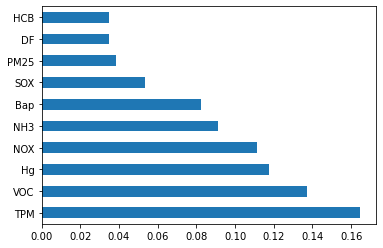

In [75]:
feat_importances1.nlargest(10).plot(kind='barh')

In [76]:
ycv= df3.Region

In [77]:
ycv.head()

0    AB
1    BC
3    MB
4    NB
5    NL
Name: Region, dtype: object

In [78]:
Xcv=df3.drop('Region',axis=1)

In [79]:
Xcv.head()

,Index,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,SOX,...,Pb,Cd,Hg,DF,Bap,Bbf,Bkf,Ip,PAH,HCB
0,1,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,27838.26,8171.57,2874.89,4778.53,...,416.16,5.77,92.82,0.0,0.41,1.43,0.51,0.41,2.75,0.0
1,1,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,24263.86,11296.73,6158.37,23807.18,...,57.77,1.85,3084.90,0.0,9.16,12.69,12.11,5.06,39.03,0.0
3,1,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,10781.34,6530.92,3287.36,500814.76,...,28.56,0.53,19959.68,0.0,0.04,0.13,0.05,0.04,0.25,0.0
4,1,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,4856.68,1529.10,651.46,8997.05,...,18.29,0.95,121.56,0.0,0.10,0.35,0.12,0.10,0.67,0.0
5,1,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,26990.26,3670.51,1494.64,7926.02,...,46.04,0.38,62.83,0.0,0.01,0.04,0.02,0.01,0.09,0.0


In [80]:
Xcv = df3.values[ : , 0 & 2:]
ycv = df3.values[ : , 1]

In [81]:
#K-fold Cross Validation using scikit learn

from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [82]:
k = 10
kf = KFold(n_splits = k, random_state = None)
lrf = LogisticRegression(solver = 'liblinear')

acc_score = []
 
for train_index , test_index in kf.split(Xcv):
    X_train , X_test = Xcv.toarray[train_index, 0:59566], Xcv.toarray[test_index, 59567:]
    y_train , y_test = ycv[train_index], ycv[test_index]

    model = lrf.fit(X_train, y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values, y_test)
    acc_score.append(acc)
    
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Xl = df3.values[ : , 0 & 2:]
yl = df3.values[ : , 1]

k = 10
kf = KFold(n_splits = k, random_state = None)
model = LogisticRegression(solver = 'liblinear')

result = cross_val_score(model , Xl, yl, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: nan


C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 576, in _validate_d

In [125]:
from sklearn.model_selection import train_test_split

Xt = df3.values[ : , 0 & 2:]
yt = df3.values[ : , 1]

X_train, X_test, Y_train, Y_test = train_test_split(Xt, yt, train_size=0.96667, test_size=0.03333, random_state=1, stratify=yt)
print('Train/Test Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (59566, 25) (2054, 25) (59566,) (2054,)


In [136]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, Y_train)

ValueError: could not convert string to float: 'YT'

In [135]:
print('Train R^2 Score : %.2f'%knn.score(X_train, Y_train))
print('Test R^2 Score : %.2f'%knn.score(X_test, Y_test))

NotFittedError: This KNeighborsRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [138]:
#define predictor and response variables
Xkf = df3.values[ : , 0:5 & 7:]
ykf = df3.values[ : , 6]

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, Xkf, ykf, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)


C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 662, in fit
    X, y = self._validate_data(
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 576, in _validate_data
  

In [139]:
#view mean absolute error
mean(absolute(scores))

nan

In [140]:
#view RMSE
sqrt(mean(absolute(scores)))

nan

In [67]:
#Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Xu = df3.drop('Region',axis=1)
yu = df3.Region

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(Xu, yu)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xu.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


ValueError: could not convert string to float: 'Ore and Mineral Industries'

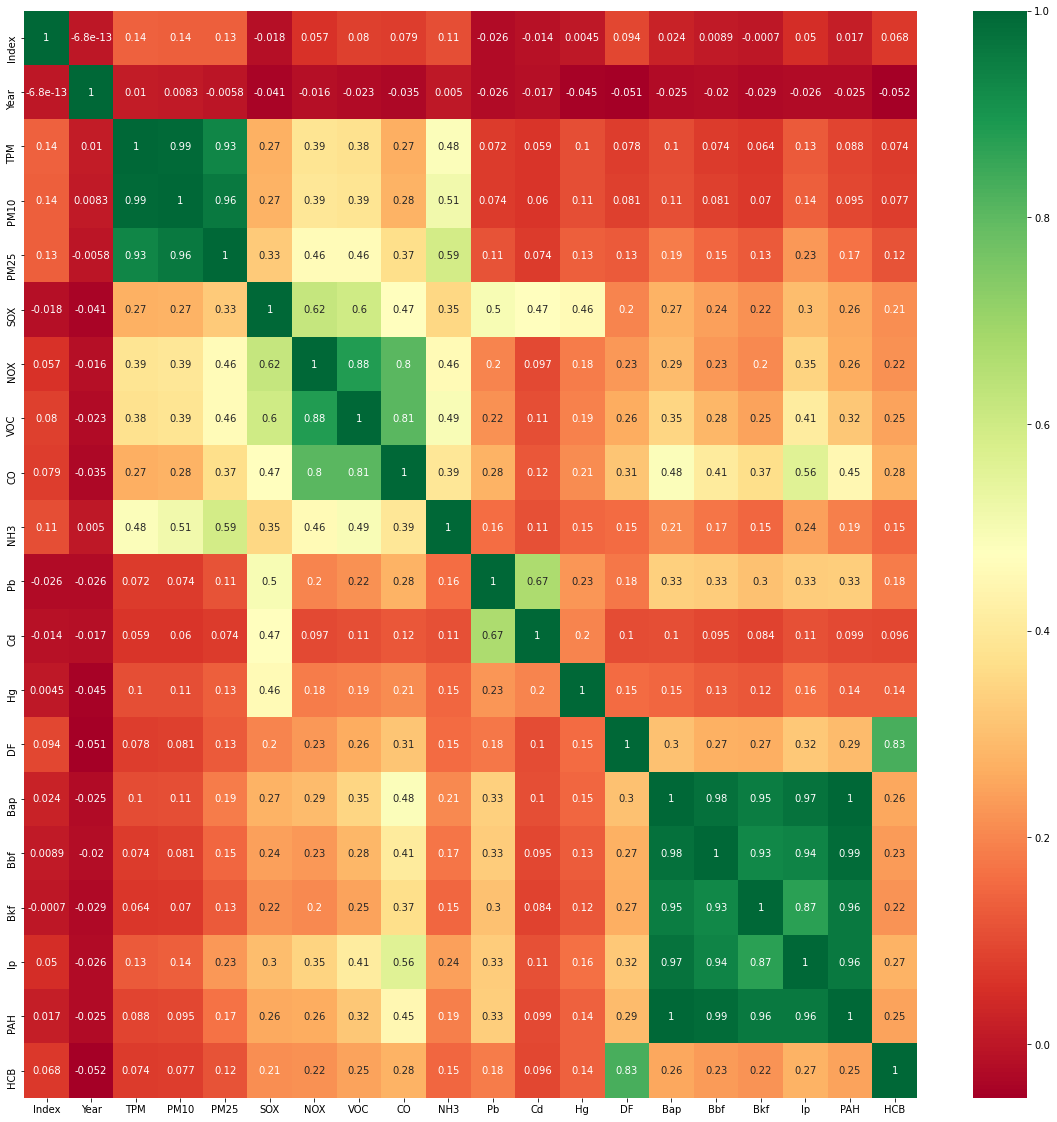

In [69]:
#Correlation Matrix with Heatmap

Xf = df3.drop('Region',axis=1)
yf = df3.Region

#get correlations of each features in dataset
corrmat = df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [93]:
#Backward Elimination
Xb = df3.drop(['Index', 'Region'], axis=1)
yb = df3['Region']

In [67]:
Xb.shape, yb.shape


((61620, 23), (61620,))

In [89]:
!pip install mlxtend

In [72]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [73]:
lreg = LinearRegression()

In [74]:
sfs1 = sfs(lreg, k_features=10, forward=False, verbose=1, scoring='neg_mean_squared_error')

In [75]:
sfs1 = sfs1.fit(Xb, yb)

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:423: RuntimeWarning: Mean of empty slice
  'avg_score': np.nanmean(k_score)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\skle

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

Features: 20/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.p

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    2.0s finished
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:642: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
Features: 16/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_s

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

Features: 15/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.p

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

Features: 14/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.p

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:642: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))
Features: 12/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorf

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

Features: 10/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.p

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Elizabeth\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Elizabeth\anaconda3\envs

In [76]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['Source', 'Sector', 'Subsector', 'total', 'Year', 'TPM', 'PM10', 'PM25']


In [77]:
new_data = df3[feat_names]
new_data['Region'] = df3['Region']

new_data.head()

C:\Users\ELIZAB~1\AppData\Local\Temp/ipykernel_22188/884190151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Region'] = df3['Region']


,Source,Sector,Subsector,total,Year,TPM,PM10,PM25,Region
0,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,27838.26,8171.57,2874.89,AB
1,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,24263.86,11296.73,6158.37,BC
3,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,10781.34,6530.92,3287.36,MB
4,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,4856.68,1529.10,651.46,NB
5,Ore and Mineral Industries,Unspecified,No_subsector,y,1990,26990.26,3670.51,1494.64,NL


In [78]:
# shape of new and original data
new_data.shape, df3.shape

((61620, 9), (61620, 25))

In [ ]:
 train_x, test_x, train_y, test_y = train_test_split(glass_data[df3.drop(['Index', 'Region']],
                                                        glass_data[df3['Region']], train_size=0.7)
 
    # Train multi-classification model with logistic regression
    lr = linear_model.LogisticRegression()
    lr.fit(train_x, train_y)
 
    # Train multinomial logistic regression model
    mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(train_x, train_y)
 
    print "Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, lr.predict(train_x))
    print "Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, lr.predict(test_x))
 
    print "Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, mul_lr.predict(train_x))
    print "Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, mul_lr.predict(test_x))
 
 